In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import copy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv


# **Lets the load the csv file data into a variable data**

In [2]:
data = pd.read_csv('/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv')

# **Lets analyse the data now !**

In [3]:
data.head()
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
data.shape

(301, 9)

In [5]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [6]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
data['Transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [9]:
data['Owner'].unique()


array([0, 1, 3])

In [10]:
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


**Check for null values**

In [11]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


year, present price, kms driven, owner

**Since I am using linear regression, I am performing feature scalling and selecting the features of Year, Present_price, Kms_driven and owners and loading this from data into a 2D matrix called x_train and the prices corresponding to it in another 1D matrix y_train. I will use x_train and y_train to train my model.**

In [13]:
x_train = np.zeros((301, 4))
for i in range(301):
    x_train[i][0] = data['Year'][i]
    x_train[i][1] = data['Present_Price'][i]
    x_train[i][2] = data['Kms_Driven'][i]
    x_train[i][3] = data['Owner'][i]
    

In [14]:
y_train = np.zeros((301, 1))
for i in range(301):
    y_train[i][0] = data['Selling_Price'][i]

In [15]:
print(f"x Shape: {x_train.shape}, x Type:{type(x_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

x Shape: (301, 4), x Type:<class 'numpy.ndarray'>)
y Shape: (301, 1), y Type:<class 'numpy.ndarray'>)


In [16]:
x_features = ['Year', 'Present Price', 'Kms Driven', 'Owner']

**Normalizing the data using mean and standard deviation and plotting the unnormalized and normalized values**


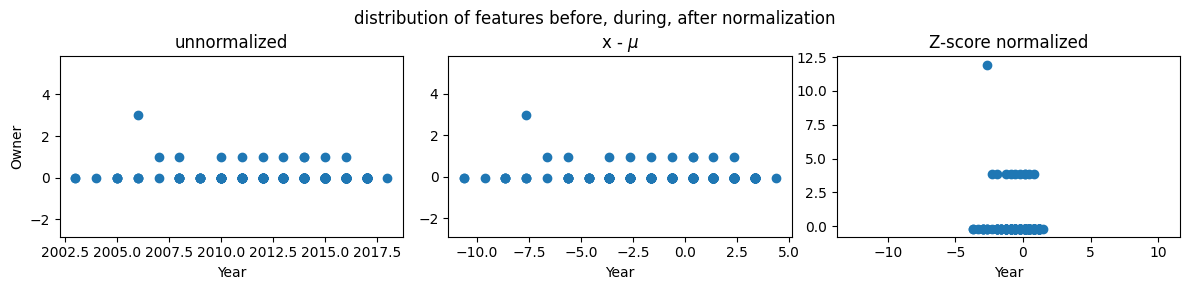

In [17]:
mu     = np.mean(x_train,axis=0)   
sigma  = np.std(x_train,axis=0) 
x_mean = (x_train - mu)
x_norm = (x_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(x_train[:,0], x_train[:,3])
ax[0].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(x_mean[:,0], x_mean[:,3])
ax[1].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3]);
ax[1].set_title(r"x - $\mu$")
ax[1].axis('equal')

ax[2].scatter(x_norm[:,0], x_norm[:,3])
ax[2].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [18]:
def zscore_normalize_features(x):
    
    mu     = np.mean(x, axis=0)
    sigma  = np.std(x, axis=0)     
    x_norm = (x - mu) / sigma      

    return (x_norm, mu, sigma)

In [19]:
X_norm, X_mu, X_sigma = zscore_normalize_features(x_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}") 
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [2.01362791e+03 7.62847176e+00 3.69472060e+04 4.31893688e-02], 
X_sigma = [2.88674689e+00 8.62974446e+00 3.88222340e+04 2.47502731e-01]
Peak to Peak range by column in Raw        X:[1.500e+01 9.228e+01 4.995e+05 3.000e+00]
Peak to Peak range by column in Normalized X:[ 5.19616045 10.69324827 12.8663384  12.12107836]


In [20]:
from scipy.stats import norm

In [21]:
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

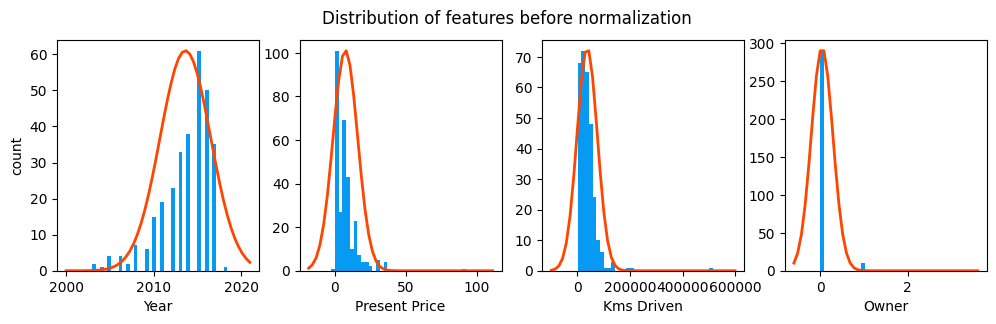

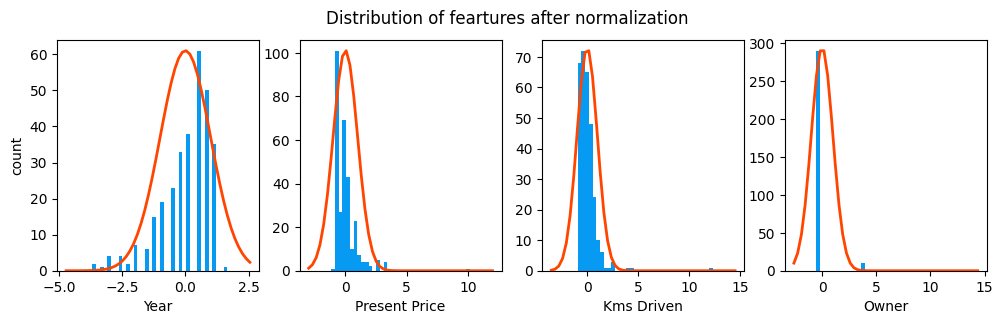

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], x_train[:,i],)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("count")
fig.suptitle("Distribution of features before normalization")
plt.show()
fig, ax = plt.subplots(1,4, figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:,i],)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("count")
fig.suptitle("Distribution of feartures after normalization")
plt.show()

**I am performing gradient descent on my model using a large learning rate alpha to make it converge to a minimum static value fast**

In [23]:
def gradient_descent(x, y, w_in, b_in, cost_func, gradient_func, alpha, num_iters):
    m = len(x) #no of training examples
    hist = {}
    hist["cost"] = []; hist["prmtrs"] = []; hist["grads"] = []; hist["iters"] = []
    w = copy.deepcopy(w_in)
    b = b_in
    interval = np.ceil(num_iters / 10000)
    print(f"Iteration Cost, w0, w1, w2, w3, b, djdw0, djdw1, djdw2, djdw3, djdb")
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_func(x,y,w,b)
        w = w.reshape(-1,1)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        #for graphing
        if i == 0 or i%interval == 0:
            hist["cost"].append(cost_func(x, y, w, b))
            hist["prmtrs"].append([w,b])
            hist["grads"].append([dj_dw, dj_db])
            hist["iters"].append(i)
        #for printing at every 10 iterations or if i < 10 then for all iterations
        if i% math.ceil(num_iters/10) == 0:
            cst = cost_func(x,y,w,b)
            print(f"Iteration : {i}")
            print(f"{cst : .2f} {w[0]} {w[1]} {w[2]} {w[3]} {b} {dj_dw[0]} {dj_dw[1]} {dj_dw[2]} {dj_dw[3]} {dj_db}")
            
    return w,b,hist

In [24]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost += (f_wb - y[i]) ** 2
    cost = cost / (2 * m)
    return (np.squeeze(cost))

In [25]:
def compute_gradient_matrix(X, y, w, b):     
    m,n = X.shape
    f_wb = X @ w + b
    f_wb = f_wb.reshape(-1, 1)
    e = np.array((4,1))
    e   = f_wb - y
    dj_dw  = (1/m) * (X.T @ e)
    dj_db  = (1/m) * np.sum(e)
        
    return dj_db,dj_dw

In [26]:
def run_gradient_descent(x,y,iterations=1000, alpha = 1e-6):

    m,n = x.shape
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(x ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f" \n\n w,b found by gradient descent:\n w: {w_out}, \n b: {b_out:0.2f}")
    
    return(w_out, b_out, hist_out)

**This cell's output shows how my w and b vary with every iterations, printing at a gap of every 100 iteration in this case**

In [27]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost, w0, w1, w2, w3, b, djdw0, djdw1, djdw2, djdw3, djdb
Iteration : 0
 19.63 [0.11982647] [0.4460275] [0.01481058] [-0.04482899] 0.46612956810631234 [-1.19826466] [-4.46027503] [-0.14810584] [0.44828988] -4.661295681063123
Iteration : 100
 1.90 [1.34571745] [4.53593614] [-0.04880273] [-0.23548651] 4.661184251582637 [8.62946421e-05] [-0.00022878] [0.00020677] [-7.15227697e-05] -0.0001238105339175753
Iteration : 200
 1.90 [1.34544696] [4.53621283] [-0.04919948] [-0.23543788] 4.661295678103439 [1.70863532e-06] [-5.13941113e-07] [1.76273171e-06] [2.76179621e-07] -3.2885817627567934e-09
Iteration : 300
 1.90 [1.34544333] [4.5362139] [-0.04920322] [-0.23543848] 4.661295681063084 [1.8003306e-08] [-5.28379564e-09] [1.84757185e-08] [3.01515935e-09] -8.781458395440441e-14
Iteration : 400
 1.90 [1.34544329] [4.53621392] [-0.04920326] [-0.23543849] 4.66129568106316 [1.89111835e-10] [-5.54926943e-11] [1.94066792e-10] [3.1681336e-11] -3.588122785233728e-15
Iteration : 500
 1.90 [1.345443

**Finally predicting my value using this w_norm and b_norm obtained and plotting the output. The output almost matches the real value so my prediction looks decent and my model is trained almost correctly using linear regression and gradient descent !!**

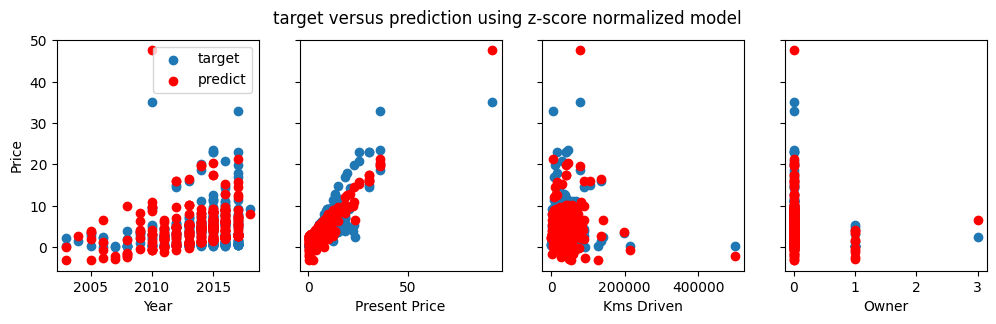

In [28]:
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm  
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color='red', label = 'predict')
ax[0].set_ylabel("Price") 
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

**Lets, predict the price for a particular car with data as -**

In [29]:
x_car = np.array([2014, 7.01, 59000, 0])
x_car_norm = (x_car - X_mu) / X_sigma
print("The normalised car data is ")
print(x_car_norm)
x_car_predict = np.dot(x_car_norm, w_norm) + b_norm
print(f" Predicted price of a car of year 2014, with present price 7.01, has run 59000 km and owner changed is 0 = ${x_car_predict}")

The normalised car data is 
[ 0.128897   -0.07166745  0.56804547 -0.17450057]
 Predicted price of a car of year 2014, with present price 7.01, has run 59000 km and owner changed is 0 = $[4.52275488]


**Since its my first machine learning model using one of the basic models of linear regression where I have normalized my data and then performed gradient descent and predicted value which is quite close to actual selling price, so I am quite satisfied with it :)**